Kaetlyn Gibson

Question 2 in other file.

# 3
Let
$$
S = {(x_1, y_1),(−x_1, y_1),\\
(x_2, y_2),(−x_2, y_2), \\  
.\\
.\\
.\\
(x_n, y_n),(−x_n, y_n)}\\
$$
be a set of 2n points which is which is symmetric about the y axis. Prove that the
degree-2n polynomial which interpolates these points has only even-degree terms.


The theorem of existence of polynomial interpolation states that for distinct points x0, x1, ..., xn, for arbitrary real values y0, y1, ..., yn, there exists a unique polynomial p of degree at most n such that p(xi) = yi for 0$\leq$i$\leq$n. Since we have 2n distinct points, there exists a unique polynomial of at most degree 2n. A characteristic of even degree functions is that they are symmetric about the y-axis, so if there were odd terms in the polynomial, it would not follow the symmetry about the y-axis. Because the points are symmetric about the y-axis, and that there exists a polynomial that interpolates these points with degree at most 2n, the interpolating polynomial only has even-degree terms.

# 5
The formula y = arctan(e<sup>x</sup>) − $\frac{π}{2}$,
when computed in floating point, experiences a loss of significance for certain values
of x. Plot one or more graphs in Jupyter which clearly show this loss of significance
(choosing the x range so as to make the graph look as “wrong” as you can). Explain
all of the features of the graph(s) that you provide.


In [158]:
# non-graphical representation
import numpy as np

def p1(x):
    approx = np.arctan(np.exp(x))
    actual = np.pi/2
    errorCheck = abs(actual-approx)
    return errorCheck
    
def testValues(intervalValues):
    for val in range(30, intervalValues):
        print(f"==>interval value = {val}")
        result = p1(val)
        print(f"====> error abs(derivative of tanx - approximation): {result}")
    print("")

intervalValues = 40

testValues(intervalValues)

==>interval value = 30
====> error abs(derivative of tanx - approximation): 9.348077867343818e-14
==>interval value = 31
====> error abs(derivative of tanx - approximation): 3.441691376337985e-14
==>interval value = 32
====> error abs(derivative of tanx - approximation): 1.2656542480726785e-14
==>interval value = 33
====> error abs(derivative of tanx - approximation): 4.6629367034256575e-15
==>interval value = 34
====> error abs(derivative of tanx - approximation): 1.5543122344752192e-15
==>interval value = 35
====> error abs(derivative of tanx - approximation): 6.661338147750939e-16
==>interval value = 36
====> error abs(derivative of tanx - approximation): 2.220446049250313e-16
==>interval value = 37
====> error abs(derivative of tanx - approximation): 0.0
==>interval value = 38
====> error abs(derivative of tanx - approximation): 0.0
==>interval value = 39
====> error abs(derivative of tanx - approximation): 0.0



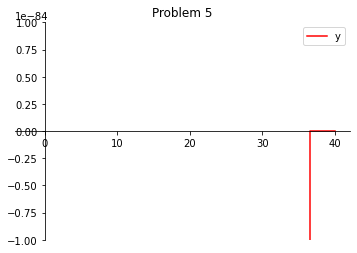

In [160]:
""" in this graph we can see around x = 37 and greater there is a loss of significance. 
The difference between arctan(e^x) and pi/2 becomes so small that it becomes 0. 
"""
import matplotlib.pyplot as plt 
import numpy as np

x = np.linspace(-2, 40, 100)
y = np.arctan(np.exp(x))-(np.pi/2)

#Setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#Plotting
plt.plot(x, y, 'r', label = 'y')

plt.legend()
plt.title('Problem 5')
#ylim small so we can see how weird this is
plt.ylim([-0.000000000000000000000000000000000000000000000000000000000000000000000000000000000001,0.000000000000000000000000000000000000000000000000000000000000000000000000000000000001])
plt.show()

<ipython-input-159-ec02023e3523>:9: RuntimeWarning: overflow encountered in exp
  y = np.arctan(np.exp(x))-(np.pi/2)


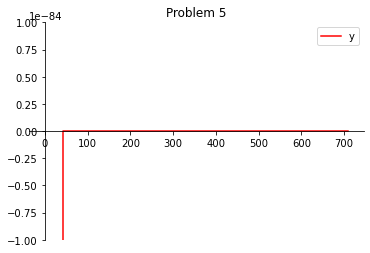

In [159]:
"""
in this graph we encounter an overflow error, as x has become too large for exp
"""
import matplotlib.pyplot as plt 
import numpy as np

# make x large as possible... 709 does not go over (but that has to do with how much np.exp() can handle)
x = np.linspace(-2, 710, 100)
y = np.arctan(np.exp(x))-(np.pi/2)

#Setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#Plotting
plt.plot(x, y, 'r', label = 'y')

plt.legend()
plt.title('Problem 5')
plt.ylim([-0.000000000000000000000000000000000000000000000000000000000000000000000000000000000001,0.000000000000000000000000000000000000000000000000000000000000000000000000000000000001])
plt.show()

# 6
Investigate the behavior of Newton’s method for the function
f(x) = arctan(x) + $\frac{1}{10}$.
In particular, the convergence theorem for Newton’s method says that there should be
an interval in which Newton’s method converges - determine, numerically, what this
interval is. In this interval, is the convergence linear or quadratic?

In [428]:
""" code for newton's method """
import numpy as np
def f(x):
    return np.arctan(x)+0.1
def fp(x):
    return (1/(x**2+1))

def newton(x0, nmax, tolerance):
    for n in range (1, nmax):
        y0 = f(x0)
        yp = fp(x0)
        x1 = x0 - (y0/yp)
        print(f"n = {n}; x = {x1}; f(x) = {f(x1)}")
        if abs(f(x1)) < tolerance:
            print(f"convergence")
            return
        x0 = x1

In [431]:
""" testing upper limits of convergence"""
xArr = np.linspace(0, 1.5, 1000)
for x in xArr:
    print(f"x = {x}")
    newton(x, 20, 1*(10**-6))
    print("")

x = 0.0
0.0
n = 1; x = -0.1; f(x) = 0.0003313475088379675
-0.1
n = 2; x = -0.10033466098392635; f(x) = 1.0990878526739856e-08
convergence

x = 0.0015015015015015015
0.0015015015015015015
n = 1; x = -0.10000022770743842; f(x) = 0.000331122055933733
-0.10000022770743842
n = 2; x = -0.1003346609990113; f(x) = 1.0975943931512688e-08
convergence

x = 0.003003003003003003
0.003003003003003003
n = 1; x = -0.10000091985677922; f(x) = 0.000330436759634567
-0.10000091985677922
n = 2; x = -0.10033466104480132; f(x) = 1.0930610278014896e-08
convergence

x = 0.0045045045045045045
0.0045045045045045045
n = 1; x = -0.10000208998845096; f(x) = 0.0003292782137701705
-0.10000208998845096
n = 2; x = -0.1003346611219978; f(x) = 1.0854183191133515e-08
convergence

x = 0.006006006006006006
0.006006006006006006
n = 1; x = -0.10000375164263789; f(x) = 0.0003276330125564636
-0.10000375164263789
n = 2; x = -0.10033466123115692; f(x) = 1.0746112041881695e-08
convergence

x = 0.0075075075075075074
0.0075075075075

<ipython-input-428-da7928fc98bd>:6: RuntimeWarning: overflow encountered in double_scalars
  return (1/(x**2+1))
<ipython-input-428-da7928fc98bd>:12: RuntimeWarning: divide by zero encountered in double_scalars
  x1 = x0 - (y0/yp)
<ipython-input-428-da7928fc98bd>:12: RuntimeWarning: invalid value encountered in double_scalars
  x1 = x0 - (y0/yp)


1.9559089500554353e+254
n = 17; x = -inf; f(x) = -1.4707963267948965
-inf
n = 18; x = nan; f(x) = nan
nan
n = 19; x = nan; f(x) = nan

x = 1.3213213213213213
1.3213213213213213
n = 1; x = -1.4875754757681339; f(x) = -0.8789487630297894
-1.4875754757681339
n = 2; x = 1.3363821257320945; f(x) = 1.0283911789741351
1.3363821257320945
n = 3; x = -1.5286305336783066; f(x) = -0.8914880091570337
-1.5286305336783066
n = 4; x = 1.4460075878624354; f(x) = 1.0657577513847312
1.4460075878624354
n = 5; x = -1.8481834851707282; f(x) = -0.9748335970958585
-1.8481834851707282
n = 6; x = 2.456469355834365; f(x) = 1.2841942980810472
2.456469355834365
n = 7; x = -6.576863721689657; f(x) = -1.3199038971523653
-6.576863721689657
n = 8; x = 51.835663299732865; f(x) = 1.6515069822200938
51.835663299732865
n = 9; x = -4387.3093914889305; f(x) = -1.4705683966688328
-4387.3093914889305
n = 10; x = 28301825.96926121; f(x) = 1.6707962914614873
28301825.96926121
n = 11; x = -1338296695700594.0; f(x) = -1.4707963267

In [432]:
""" testing lower limits of convergence"""
xArr = np.linspace(-1.5, 0, 1000)
for x in xArr:
    print(f"x = {x}")
    newton(x, 20, 1*(10**-6))
    print("")

x = -1.5
-1.5
n = 1; x = 1.3690796005538193; f(x) = 1.0399461208450922
1.3690796005538193
n = 2; x = -1.6201196410960366; f(x) = -0.9177978907830936
-1.6201196410960366
n = 3; x = 1.7067028199552818; f(x) = 1.140790315183979
1.7067028199552818
n = 4; x = -2.7570209004082034; f(x) = -1.122843437444075
-2.7570209004082034
n = 5; x = 6.900739926791664; f(x) = 1.5268860975071836
6.900739926791664
n = 6; x = -67.33678512724276; f(x) = -1.4559466945593995
-67.33678512724276
n = 7; x = 6535.734732898772; f(x) = 1.6706433218102907
6535.734732898772
n = 8; x = -71356379.55305672; f(x) = -1.4707963127807326
-71356379.55305672
n = 9; x = 7488901907922533.0; f(x) = 1.6707963267948966
7488901907922533.0
n = 10; x = -9.370435939810444e+31; f(x) = -1.4707963267948965
-9.370435939810444e+31
n = 11; x = 1.2914337399180563e+64; f(x) = 1.6707963267948966
1.2914337399180563e+64
n = 12; x = -2.786555959388043e+128; f(x) = -1.4707963267948965
-2.786555959388043e+128
n = 13; x = 1.1420577742000643e+257; f(x)

<ipython-input-428-da7928fc98bd>:6: RuntimeWarning: overflow encountered in double_scalars
  return (1/(x**2+1))
<ipython-input-428-da7928fc98bd>:12: RuntimeWarning: divide by zero encountered in double_scalars
  x1 = x0 - (y0/yp)
<ipython-input-428-da7928fc98bd>:12: RuntimeWarning: invalid value encountered in double_scalars
  x1 = x0 - (y0/yp)


convergence

x = -1.4054054054054055
-1.4054054054054055
n = 1; x = 1.1305304733063137; f(x) = 0.9465883326652258
1.1305304733063137
n = 2; x = -1.0258916037550774; f(x) = -0.6981778176280158
-1.0258916037550774
n = 3; x = 0.40708595936590797; f(x) = 0.4865999978024218
0.40708595936590797
n = 4; x = -0.16015289291937185; f(x) = -0.05880433518902056
-0.16015289291937185
n = 5; x = -0.09984028832961463; f(x) = 0.0004894803747989146
-0.09984028832961463
n = 6; x = -0.10033464788550145; f(x) = 2.3958755257513786e-08
convergence

x = -1.4039039039039038
-1.4039039039039038
n = 1; x = 1.1269360931512757; f(x) = 0.9450077166142027
1.1269360931512757
n = 2; x = -1.0182172088013637; f(x) = -0.694424304881674
-1.0182172088013637
n = 3; x = 0.3961628023795658; f(x) = 0.47719407748592557
0.3961628023795658
n = 4; x = -0.15592448336765086; f(x) = -0.054678967309209625
-0.15592448336765086
n = 5; x = -0.0999161366996823; f(x) = 0.00041438116871188313
-0.0999161366996823
n = 6; x = -0.100334654732721

I used Newton's method to test a range of 1000 values between 0 and 1.5 and a range of 1000 values between -1.5 and 0 to estimate where the interval of convergence was. I used a tolerance of 1.0 x 10<sup>-6</sup> (I originally did 1.0 x 10<sup>-6</sup>, but that did not have a noticable difference on my results). My attempt showed an interval of convergence of about [-1.4804804804804805, 1.3183183183183182].

The root is located at (-tan(1/10), 0) or approximately r = -0.103346721.... Checking f' and f'' at this location shows that the value is approximately 1.010169422 and -2.040884524, respectively. Note that f'(r) and f''(r) are not equal to zero and both are continuous derivatives. Looking at the f(x) values, there appears to be quadratic convergence (such as going from 10<sup>-3</sup> to 10<sup>-6</sup> to 10<sup>-13</sup>).

# 7
There are infinitely many solutions to the equation
cos( $\frac{1}{x}$) =  $\frac{1}{3}$,  x ∈ (0, 1].

Find, numerically, thirty of them.


In [268]:
"""
If you run it again, it will take a couple seconds to go through all of the x values.
If the difference between the value I got from np.cos(1/x) and 1/3 was within the 
tolerance of 2^(-20), I accepted it as a reasonable answer (the number of x values 
used was already so large and it already took long enough to compute)
"""
import numpy as np

xArr = np.linspace(0, 1, 20800000) # divide by zero warning occurs because I included zero here
yArr = np.cos(1/xArr)

#doing a little check to make sure an answer below is doing the correct thing...
print(xArr[870228])
print(yArr[870228])
print(np.cos(1/0.04183788662682147))

exp = 1/3
count = 0
for y in range(len(yArr)):
    error = abs(yArr[y] - exp)
    if error < 2**(-20):
        count += 1
#         print(y)
        print(f"{count}: f({xArr[y]}) = {yArr[y]}")

<ipython-input-268-9d79c0645144>:11: RuntimeWarning: divide by zero encountered in true_divide
  yArr = np.cos(1/xArr)
<ipython-input-268-9d79c0645144>:11: RuntimeWarning: invalid value encountered in cos
  yArr = np.cos(1/xArr)


0.04183788662682147
0.33333248594666837
0.33333248594666837
1: f(0.04183788662682147) = 0.33333248594666837
2: f(0.07247779194604768) = 0.33333353429128965
3: f(0.13308236216742125) = 0.3333342515216107
4: f(0.19793255759291142) = 0.3333333718543998
5: f(0.8123738371333575) = 0.33333243415472336
6: f(0.8123738852102829) = 0.33333250283763255
7: f(0.8123739332872083) = 0.3333325715205321
8: f(0.8123739813641336) = 0.3333326402034216
9: f(0.8123740294410591) = 0.3333327088863013
10: f(0.8123740775179844) = 0.33333277756917096
11: f(0.8123741255949098) = 0.3333328462520309
12: f(0.8123741736718353) = 0.333332914934881
13: f(0.8123742217487606) = 0.3333329836177209
14: f(0.8123742698256861) = 0.33333305230055127
15: f(0.8123743179026114) = 0.3333331209833713
16: f(0.8123743659795368) = 0.3333331896661818
17: f(0.8123744140564622) = 0.3333332583489822
18: f(0.8123744621333876) = 0.3333333270317728
19: f(0.8123745102103129) = 0.33333339571455334
20: f(0.8123745582872384) = 0.3333334643973243

# 8
For n = 2, 3, 4, 5, find the degree-n polynomials which interpolate the function

f(x) = cos(2*arccos(x))

at n + 1 equally spaced points a<sub>0</sub>, ... , a<sub>n</sub>, where a<sub>i</sub> = ih, and h = $\frac{1}{n}$.
What happens? Explain.

In [270]:
import numpy as np

def getDividedDiff(xVals, yVals):
    """ calculates the divided difference """
    p_coeffs = np.copy(yVals)
    for j in range(1, len(xVals)):
        for i in range(len(xVals)-1, j-1, -1):
            currX = xVals[i-j]
            currY = p_coeffs[i-1]
            nextX = xVals[i]
            nextY = p_coeffs[i]
            p_coeffs[i] = (nextY-currY)/(nextX-currX)
    return p_coeffs          

def interpolatePoly(xVals, yVals):   
    def result(t):
        """ calculates the polynomial and values of the polynomial in range t"""
        p_coeffs = getDividedDiff(xVals,yVals)
        p = p_coeffs[len(xVals)-1]
        for i in range(len(xVals)-2,-1,-1):
            p = p*(t-xVals[i]) + p_coeffs[i]
        return p
    return result

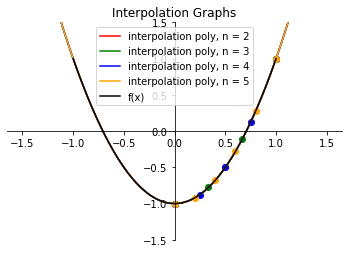

In [327]:
import matplotlib.pyplot as plt 
import numpy as np

#n = 2
h = 1/2
xpt2 = np.array([h*a for a in range(2+1)]) 
ypt2 = np.array([np.cos(2*np.arccos(x)) for x in xpt2])

#n = 3
h = 1/3
xpt3 = np.array([h*a for a in range(3+1)]) 
ypt3 = np.array([np.cos(2*np.arccos(x)) for x in xpt3])

#n = 4
h = 1/4
xpt4 = np.array([h*a for a in range(4+1)]) 
ypt4 = np.array([np.cos(2*np.arccos(x)) for x in xpt4])

#n = 5
h = 1/5
xpt5 = np.array([h*a for a in range(5+1)]) 
ypt5 = np.array([np.cos(2*np.arccos(x)) for x in xpt5])

#f(x)
x = np.linspace(-1, 1, 100)
y = np.cos(2*np.arccos(x))

#Calculates graphs interpolating polynomial
tval = np.linspace(-1.5, 1.5, 100)
p2 = interpolatePoly(xpt2, ypt2)
yval2 = p2(tval)

p3 = interpolatePoly(xpt3, ypt3)
yval3 = p3(tval)

p4 = interpolatePoly(xpt4, ypt4)
yval4 = p4(tval)

p5 = interpolatePoly(xpt5, ypt5)
yval5 = p5(tval)

#Setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#Plotting
plt.plot(tval,yval2, 'r', label = 'interpolation poly, n = 2')
plt.plot(xpt2,ypt2,color='r',marker='o', linestyle='') # the equally spaced points

plt.plot(tval,yval3, 'g', label = 'interpolation poly, n = 3')
plt.plot(xpt3,ypt3,color='g',marker='o', linestyle='') # the equally spaced points

plt.plot(tval,yval4, 'b', label = 'interpolation poly, n = 4')
plt.plot(xpt4,ypt4,color='b',marker='o', linestyle='') # the equally spaced points

plt.plot(tval,yval5, 'orange', label = 'interpolation poly, n = 5')
plt.plot(xpt5,ypt5,color='orange',marker='o', linestyle='') # the equally spaced points
#f(x)
plt.plot(x,y, 'black', label = 'f(x)')

plt.legend()
plt.title('Interpolation Graphs')
plt.ylim([-1.5,1.5])
plt.show()

Despite increasing n and thus decreasing h for n+1 equally spaced points, each interpolation polynomial is equal to 2x<sup>2</sup>-1. I also checked the points in two online interpolation calculators and got the same results for the polynomial (just to make sure I my program was running correctly).

I think the reason that the interpolation polynomials are all the same has something to do with how the points are spaced always falls within the interval of [0, 1], and that the domain and range of 
f(x) falls within that same interval. I also think that it has to do with f(x) being a quadratic polynomial. Interestingly, if were were to change to f(x) = cos(arccos(x)) it becomes a straight line in that same interval, while f(x) = cos(3*arccos(x)) becomes a cubic polynomial in that same interval (though it does not have the same relationship with 1/n). 